### 230409 하은서 필수과제2
- mpg, 타이타닉 데이터를 groupby 등으로 깔끔하게 정리한 데이터를 비교 시각화 진행해 주세요.
- 최소 시각화는 5개 이상을 해주시고 ( 우리가 배웠던 다양한 그래프는 필수적으로 1개 이상씩은 진행해 주셔야 합니다. )

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
mpg = pd.read_csv('mpg.csv')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


#### mpg 데이터 정리하기

In [5]:
# 'manufacturer'별 'hwy'로 정리하기

mpg_mf = mpg.groupby(mpg['manufacturer']).mean().copy()
mpg_mf

C:\Users\HAEUNSEO\AppData\Local\Temp\ipykernel_47996\1527130530.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mpg_mf = mpg.groupby(mpg['manufacturer']).mean().copy()


,displ,year,cyl,cty,hwy
manufacturer,,,,,
audi,2.544444,2003.500000,5.222222,17.611111,26.444444
chevrolet,5.063158,2004.684211,7.263158,15.000000,21.894737
dodge,4.378378,2004.108108,7.081081,13.135135,17.945946
ford,4.536000,2002.600000,7.200000,14.000000,19.360000
honda,1.711111,2003.000000,4.000000,24.444444,32.555556
hyundai,2.428571,2004.142857,4.857143,18.642857,26.857143
jeep,4.575000,2005.750000,7.250000,13.500000,17.625000
land rover,4.300000,2003.500000,8.000000,11.500000,16.500000
lincoln,5.400000,2002.000000,8.000000,11.333333,17.000000


<Axes: xlabel='manufacturer'>

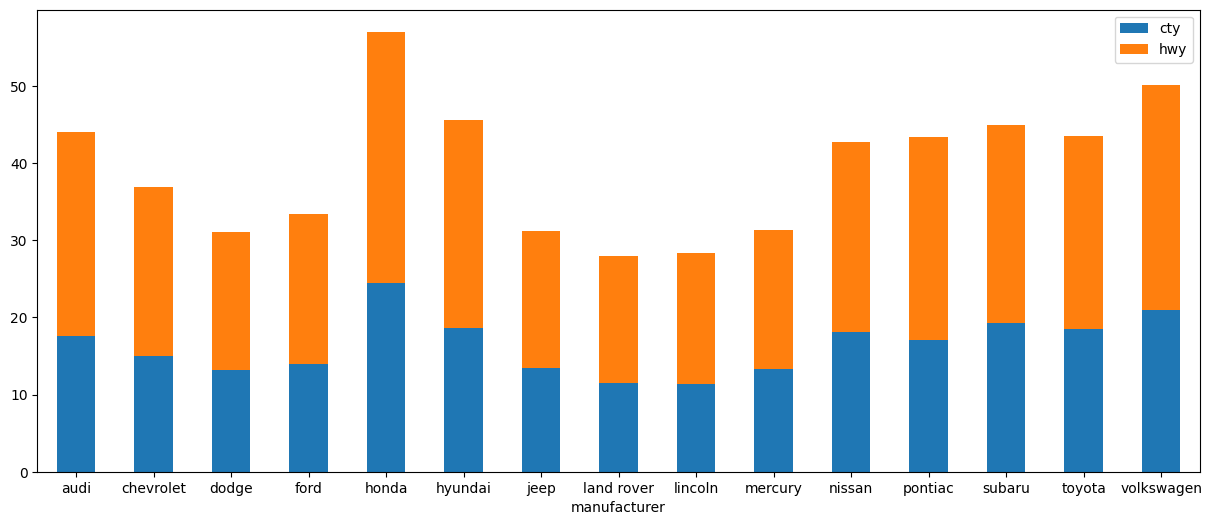

In [6]:
mpg_mf[['cty','hwy']].plot(kind='bar', rot=0, figsize=(15,6),stacked = True)

In [7]:
mpg_audi = mpg.query("manufacturer == 'audi'").groupby('category', as_index=False).mean()
mpg_audi

C:\Users\HAEUNSEO\AppData\Local\Temp\ipykernel_47996\1175670806.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mpg_audi = mpg.query("manufacturer == 'audi'").groupby('category', as_index=False).mean()


,category,displ,year,cyl,cty,hwy
0,compact,2.380000,2003.2,4.933333,17.933333,26.933333
1,midsize,3.366667,2005.0,6.666667,16.000000,24.000000


<Axes: xlabel='category', ylabel='hwy'>

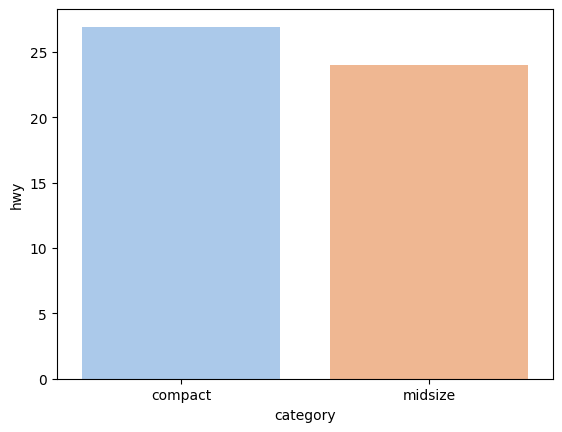

In [8]:
# 고속도로연비
sns.barplot(mpg_audi, x='category', y='hwy', palette='pastel')

In [78]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [79]:
count = titanic['sex'].value_counts()
count 

male      577
female    314
Name: sex, dtype: int64

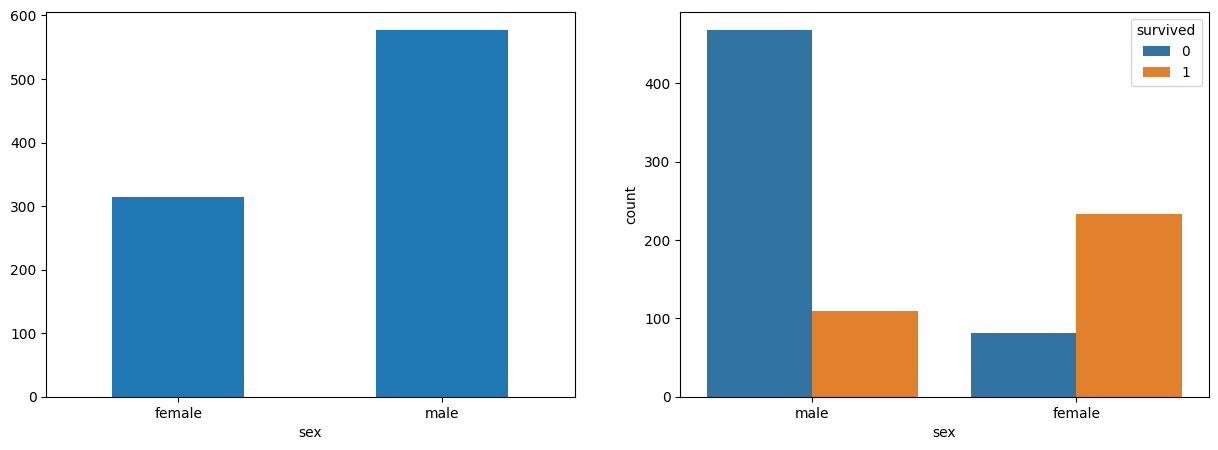

In [80]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))
titanic.groupby('sex', as_index=True).size().plot.bar(ax=ax[0], rot=0)
sns.countplot( data=titanic, x='sex', hue='survived', ax=ax[1])
plt.show()


In [153]:
m1 = titanic.query('survived == 1').groupby('pclass', as_index=False).count()
m1

,pclass,survived,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1,136,136,122,136,136,136,134,136,136,136,117,134,136,136
1,2,87,87,83,87,87,87,87,87,87,87,13,87,87,87
2,3,119,119,85,119,119,119,119,119,119,119,6,119,119,119


In [154]:
m0 = titanic.query('survived == 0').groupby('pclass', as_index=False).count()
m0

,pclass,survived,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1,80,80,64,80,80,80,80,80,80,80,58,80,80,80
1,2,97,97,90,97,97,97,97,97,97,97,3,97,97,97
2,3,372,372,270,372,372,372,372,372,372,372,6,372,372,372


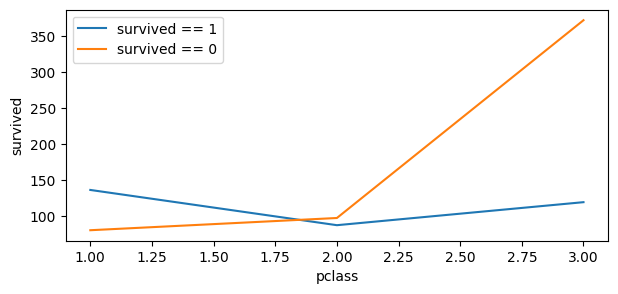

In [166]:
# pclass별 생존자수와 사망자수 비교

f, ax = plt.subplots(1, 1, figsize=(7,3))
sns.lineplot(x= m1['pclass'], y=m1['survived'],ax=ax, label='survived == 1')
sns.lineplot(x= m0['pclass'], y=m0['survived'],ax=ax, label='survived == 0')
plt.legend()

plt.show()

In [174]:
pd.crosstab(titanic['pclass'], titanic['survived'], margins=True).style.background_gradient(cmap='summer_r')

survived,0,1,All
pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891
